#

# Code

In [1]:
# %conda install sciki

In [2]:
## Adding folder above notebookt to path (for importing from CODE)
import os, sys
# sys.path.append(os.path.abspath('../'))

## Automatically reload changed functions
%load_ext autoreload
%autoreload 2

# Custom Code used in lessons
import CODE
import CODE.lp_functions as lp

# Importing standard packages and viz styles
from CODE.standard_imports import *

# Function lp.show_code to see source code
lp.show_code(CODE.standard_imports)

```python
"""
Standard Imports module: lazy importing of essential packages

Example Use:
>> from CODE.standard_imports import *
"""
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

```

In [3]:

lp.show_code(CODE.lp_styles)
from CODE.lp_styles import *
plt.rcParams['figure.figsize'] = (8, 12)

```python
import matplotlib.pyplot as plt
import seaborn as sns
fav_style = ('ggplot','tableau-colorblind10')
fav_context  ={'context':'notebook', 'font_scale':1.2}
plt.style.use(fav_style)
sns.set_context(**fav_context)
plt.rcParams['savefig.transparent'] = False
plt.rcParams['savefig.bbox'] = 'tight'

```

In [4]:
# Function for Showing Source Code in Markdown with Python Syntax
lp.show_code(lp.show_code)

```python
def show_code(function):
    """Display the source code of a funciton or module.
    Uses the inspect and IPython modules to display Markdown with Python Syntax. 
    Args:
        function (function or module object): Pass the function/module to show. 
                                              Use function name, no parentheses.
        
    Example Use:
    ## Example with Function
    >> import CODE.lp_functions as lp
    >> import scipy.stats as stats
    >> lp.show_code(stats.ttest_ind)  
    """
    
    import inspect 
    from IPython.display import display,Markdown
    
    code = inspect.getsource(function)
    md_txt = f"```python\n{code}\n```"
    return display(Markdown(md_txt))

```

In [5]:
## Preprocessing Imports ([ ] TO DO: Consider making preprocess_imports module)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import (make_column_transformer, make_column_selector, 
                             ColumnTransformer)
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn import metrics
from sklearn.base import clone

##import statsmodels correctly
import statsmodels.api as sm
from scipy import stats


## fixing random for lesson generation
np.random.seed(321)


In [6]:
## Load in data
FILE = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSEZQEzxja7Hmj5tr5nc52QqBvFQdCAGb52e1FRK1PDT2_TQrS6rY_TR9tjZjKaMbCy1m5217sVmI5q/pub?output=csv"


df = pd.read_csv(FILE)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
from pandas_profiling import ProfileReport
# ProfileReport(df)

In [8]:
# Date feature engineering 
df['datetime'] = pd.to_datetime(df['date'])

df['Month'] =  df['datetime'].dt.month_name()
df['Year'] = df['datetime'].dt.month_name()
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,datetime,Month,Year
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014-10-13,October,October
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014-12-09,December,December
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015-02-25,February,February
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014-12-09,December,December
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015-02-18,February,February
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,2014-05-21,May,May
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,2015-02-23,February,February
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,2014-06-23,June,June
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,2015-01-16,January,January


In [9]:
## Drop unwanted columns
DROP_COLS = ['id','date','datetime']
df = df.drop(columns=DROP_COLS)

In [10]:
## Convert all categories to strings
CONVERT_TO_STR_COLS = ['zipcode']
df[CONVERT_TO_STR_COLS] = df[CONVERT_TO_STR_COLS].astype(str)

CONVERT_TO_NUM_COLS = []
for col in CONVERT_TO_NUM_COLS:
    df[col] = pd.to_numeric(df[col])

In [11]:
## final info before X/y
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  object 
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

## Preprocessing with Scikit-Learn 1.1+

In [12]:
# Run the following command on your local computer to check the version of sklearn
import sklearn
!python --version
print(f"sklearn version: {sklearn.__version__}")

Python 3.9.15
sklearn version: 1.1.3


### Preprocessing + ColumnTransformer


In [13]:
## Make x and y variables
target = 'price'
drop_cols_model = []

y = df[target].copy()
X = df.drop(columns=[target,*drop_cols_model]).copy()

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=321)
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Month,Year
8306,3,2.50,2250,9235,2.0,0,0,3,8,2250,0,1985,0,98052,47.7268,-122.105,2290,8187,October,October
18426,4,2.75,1590,6000,1.5,0,0,4,8,1590,0,1925,0,98112,47.6401,-122.299,1590,4000,March,March
11280,4,1.75,2040,6000,1.0,0,0,5,7,1020,1020,1943,0,98136,47.5507,-122.383,1440,6000,December,December
13891,3,1.00,1200,9800,1.0,0,0,4,7,1200,0,1971,0,98072,47.7412,-122.109,1220,10220,May,May
6498,3,2.25,1570,8767,1.0,0,0,3,7,1180,390,1990,0,98038,47.3568,-122.038,1570,7434,April,April


In [14]:
## make categorical preprocessing pipeline
cat_sel = make_column_selector(dtype_include='object')

cat_pipe = make_pipeline( SimpleImputer(strategy='constant', 
                                        fill_value='MISSING'),
                         OneHotEncoder(handle_unknown='ignore',
                                       sparse=False) )
cat_pipe

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='MISSING', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [15]:
## make numeric preprocessing pipeline
num_sel = make_column_selector(dtype_include='number')

num_pipe = make_pipeline( SimpleImputer(strategy='mean'), 
#                          StandardScaler() 
                        )
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer())])

>- Note: So far, all of the code should be familiar to you. 
    -  With sklearn v1.1+, you should always add `verbose_feature_names_out=False` to column transformers *`ColumnTransformer`/ `make_column_transformer`)
        - (If you want to see what the verbose version looks like feel free to give it a try!)

In [16]:
## make the preprocessing column transformer
preprocessor = make_column_transformer( (num_pipe, num_sel),
                                        (cat_pipe,cat_sel),                                      
                                       verbose_feature_names_out=False)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x15525ab20>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x15524faf0>)],
                  verbose_feature_names_out=False)

In [17]:
## Get feature names
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()
feature_names

array(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'zipcode_98001', 'zipcode_98002',
       'zipcode_98003', 'zipcode_98004', 'zipcode_98005', 'zipcode_98006',
       'zipcode_98007', 'zipcode_98008', 'zipcode_98010', 'zipcode_98011',
       'zipcode_98014', 'zipcode_98019', 'zipcode_98022', 'zipcode_98023',
       'zipcode_98024', 'zipcode_98027', 'zipcode_98028', 'zipcode_98029',
       'zipcode_98030', 'zipcode_98031', 'zipcode_98032', 'zipcode_98033',
       'zipcode_98034', 'zipcode_98038', 'zipcode_98039', 'zipcode_98040',
       'zipcode_98042', 'zipcode_98045', 'zipcode_98052', 'zipcode_98053',
       'zipcode_98055', 'zipcode_98056', 'zipcode_98058', 'zipcode_98059',
       'zipcode_98065', 'zipcode_98070', 'zipcode_98072', 'zipcode_98074',
       'zipcode_98075', 'zipcode_98077', 'zipcode_98

In [18]:
### PREP ALL X VARS
## Prepare X_train_df
X_train_df = pd.DataFrame( preprocessor.fit_transform(X_train), 
                          columns = feature_names,
                         index = X_train.index)

## Prepare X_test_df
X_test_df = pd.DataFrame( preprocessor.transform(X_test),
                          columns = feature_names,
                         index=X_test.index)
X_train_df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,zipcode_98001,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,...,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,Month_April,Month_August,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September,Year_April,Year_August,Year_December,Year_February,Year_January,Year_July,Year_June,Year_March,Year_May,Year_November,Year_October,Year_September
8306,3.0,2.50,2250.0,9235.0,2.0,0.0,0.0,3.0,8.0,2250.0,0.0,1985.0,0.0,47.7268,-122.105,2290.0,8187.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
18426,4.0,2.75,1590.0,6000.0,1.5,0.0,0.0,4.0,8.0,1590.0,0.0,1925.0,0.0,47.6401,-122.299,1590.0,4000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
11280,4.0,1.75,2040.0,6000.0,1.0,0.0,0.0,5.0,7.0,1020.0,1020.0,1943.0,0.0,47.5507,-122.383,1440.0,6000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13891,3.0,1.00,1200.0,9800.0,1.0,0.0,0.0,4.0,7.0,1200.0,0.0,1971.0,0.0,47.7412,-122.109,1220.0,10220.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6498,3.0,2.25,1570.0,8767.0,1.0,0.0,0.0,3.0,7.0,1180.0,390.0,1990.0,0.0,47.3568,-122.038,1570.0,7434.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11976,3.0,2.50,2230.0,5800.0,2.0,0.0,0.0,3.0,7.0,2230.0,0.0,2004.0,0.0,47.5308,-121.847,2230.0,6088.0,0

In [19]:
## Customization Options
pd.set_option("display.max_columns",100)
X_train_df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,zipcode_98001,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,...,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,Month_April,Month_August,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September,Year_April,Year_August,Year_December,Year_February,Year_January,Year_July,Year_June,Year_March,Year_May,Year_November,Year_October,Year_September
8306,3.0,2.50,2250.0,9235.0,2.0,0.0,0.0,3.0,8.0,2250.0,0.0,1985.0,0.0,47.7268,-122.105,2290.0,8187.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
18426,4.0,2.75,1590.0,6000.0,1.5,0.0,0.0,4.0,8.0,1590.0,0.0,1925.0,0.0,47.6401,-122.299,1590.0,4000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
11280,4.0,1.75,2040.0,6000.0,1.0,0.0,0.0,5.0,7.0,1020.0,1020.0,1943.0,0.0,47.5507,-122.383,1440.0,6000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13891,3.0,1.00,1200.0,9800.0,1.0,0.0,0.0,4.0,7.0,1200.0,0.0,1971.0,0.0,47.7412,-122.109,1220.0,10220.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6498,3.0,2.25,1570.0,8767.0,1.0,0.0,0.0,3.0,7.0,1180.0,390.0,1990.0,0.0,47.3568,-122.038,1570.0,7434.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11976,3.0,2.50,2230.0,5800.0,2.0,0.0,0.0,3.0,7.0,2230.0,0.0,2004.0,0.0,47.5308,-121.847,2230.0,6088.0,0

In [20]:
def evaluate_regression(model, X_train,y_train, X_test, y_test): 
    """Evaluates a scikit learn regression model using r-squared and RMSE"""
    
    ## Training Data
    y_pred_train = model.predict(X_train)
    r2_train = metrics.r2_score(y_train, y_pred_train)
    rmse_train = metrics.mean_squared_error(y_train, y_pred_train, 
                                            squared=False)
    
    print(f"Training Data:\tR^2 = {r2_train:,.2f}\tRMSE = {rmse_train:,.2f}")
        
    
    ## Test Data
    y_pred_test = model.predict(X_test)
    r2_test = metrics.r2_score(y_test, y_pred_test)
    rmse_test = metrics.mean_squared_error(y_test, y_pred_test, 
                                            squared=False)
    
    print(f"Test Data:\tR^2 = {r2_test:,.2f}\tRMSE = {rmse_test:,.2f}")


In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
reg = LinearRegression()
reg.fit(X_train_df,y_train)
evaluate_regression(reg, X_train_df, y_train, X_test_df, y_test)

Training Data:	R^2 = 0.81	RMSE = 159,616.62
Test Data:	R^2 = 0.80	RMSE = 162,820.85


In [23]:
reg.coef_

array([-2.42404592e+04,  2.39844465e+04,  1.25699365e+12,  2.12067951e-01,
       -4.64286022e+04,  6.63307823e+05,  5.85947660e+04,  2.52629282e+04,
        5.91532036e+04, -1.25699365e+12, -1.25699365e+12, -6.24818341e+02,
        1.61367831e+01,  1.63682304e+05, -1.34612686e+05,  1.15422064e+01,
       -7.63921399e-02, -1.04550911e+07, -1.04249682e+07, -1.04818590e+07,
       -9.70938886e+06, -1.01822116e+07, -1.02239442e+07, -1.02438812e+07,
       -1.02326929e+07, -1.03652595e+07, -1.04002349e+07, -1.03643564e+07,
       -1.03976117e+07, -1.04188515e+07, -1.05071770e+07, -1.02893645e+07,
       -1.02839760e+07, -1.04121509e+07, -1.02571629e+07, -1.04535494e+07,
       -1.04495721e+07, -1.04696107e+07, -1.01382492e+07, -1.03167605e+07,
       -1.04046500e+07, -9.14589249e+06, -9.98889201e+06, -1.04444568e+07,
       -1.03265620e+07, -1.02719012e+07, -1.02983268e+07, -1.04276019e+07,
       -1.03824227e+07, -1.04397375e+07, -1.03864236e+07, -1.03615064e+07,
       -1.05053686e+07, -

In [24]:
reg.intercept_

128931251.37493376

In [25]:
## Saving the coefficients
coeffs = pd.Series(reg.coef_, index= feature_names)
coeffs

bedrooms         -2.424046e+04
bathrooms         2.398445e+04
sqft_living       1.256994e+12
sqft_lot          2.120680e-01
floors           -4.642860e+04
                      ...     
Year_March       -3.246861e+07
Year_May         -7.098600e+07
Year_November    -6.734069e+07
Year_October     -7.099241e+07
Year_September   -7.099308e+07
Length: 111, dtype: float64

In [26]:
pd.set_option('display.float_format',lambda x: f"{x:,.4f}")
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_rows', 100)

In [27]:
coeffs

bedrooms                   -24,240.4592
bathrooms                   23,984.4465
sqft_living      1,256,993,654,045.5864
sqft_lot                         0.2121
floors                     -46,428.6022
                          ...          
Year_March             -32,468,612.0868
Year_May               -70,986,004.3074
Year_November          -67,340,692.6427
Year_October           -70,992,409.8595
Year_September         -70,993,084.8287
Length: 111, dtype: float64

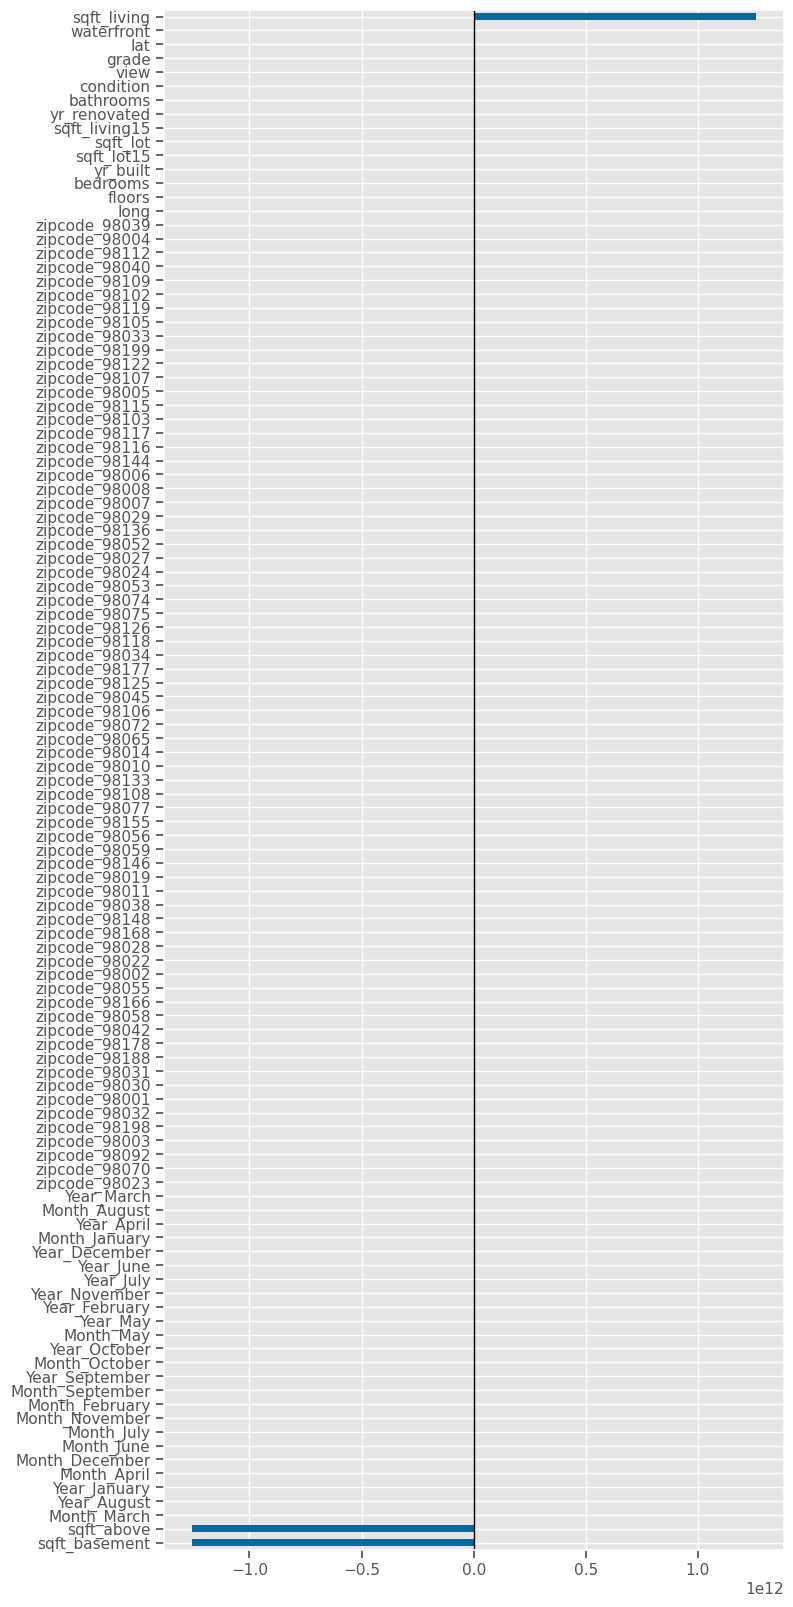

In [28]:
with sns.plotting_context('notebook'):
    ax = coeffs.sort_values().plot(kind='barh',figsize=(8,20))
    ax.axvline(0,color='k', lw=1)

In [29]:
coeffs

bedrooms                   -24,240.4592
bathrooms                   23,984.4465
sqft_living      1,256,993,654,045.5864
sqft_lot                         0.2121
floors                     -46,428.6022
                          ...          
Year_March             -32,468,612.0868
Year_May               -70,986,004.3074
Year_November          -67,340,692.6427
Year_October           -70,992,409.8595
Year_September         -70,993,084.8287
Length: 111, dtype: float64

### Multicollinearity & One Hot Encoding

In [30]:
pd.options.display.max_rows

100

In [31]:
df.select_dtypes('object').nunique()

zipcode    70
Month      12
Year       12
dtype: int64

## UPDATE THIS
- Here is where we should consider our final use case for this data. If we want to explain student performance, there is no benefit to one-hot-encoding both categories.
- We know that if someone has a 0 for "paid_yes," that it means "paid_no" would be 1.
- To remove these unnecessary columns, we can change our arguments for our OneHotEncoder in our pipeline and add "drop='if_binary'" or "drop='first'/'last' to automatically drop one of the categories to reduce multicollinearity.
- HOWEVER, we cannot use BOTH handle_unknown AND the drop argument together. We will get an error message.
Since our current modeling will be used to extract insights for our stakeholders and will not be deployed to the cloud where it will run predictions on new data, we can safely switch to using the drop='if_binary' option.

In [32]:
## make categorical preprocessing pipeline
cat_sel = make_column_selector(dtype_include='object')

cat_pipe = make_pipeline( SimpleImputer(strategy='constant', 
                                        fill_value='MISSING'),
                         OneHotEncoder(drop='first',
                                       sparse=False,
                                       max_categories=15) )
cat_pipe

## make numeric preprocessing pipeline
num_sel = make_column_selector(dtype_include='number')

num_pipe = make_pipeline( SimpleImputer(strategy='mean'), 
#                          StandardScaler() 
                        )
num_pipe

## make the preprocessing column transformer
preprocessor = make_column_transformer( (num_pipe, num_sel),
                                        (cat_pipe,cat_sel),                                      
                                       verbose_feature_names_out=False)
preprocessor

## Get feature names
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()
feature_names

### PREP ALL X VARS
## Prepare X_train_df
X_train_df = pd.DataFrame( preprocessor.fit_transform(X_train), 
                          columns = feature_names,
                         index = X_train.index)

## Prepare X_test_df
X_test_df = pd.DataFrame( preprocessor.transform(X_test),
                          columns = feature_names,
                         index=X_test.index)
X_train_df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,zipcode_98023,zipcode_98034,zipcode_98038,zipcode_98042,zipcode_98052,zipcode_98059,zipcode_98074,zipcode_98103,zipcode_98115,zipcode_98117,zipcode_98118,zipcode_98133,zipcode_98155,zipcode_infrequent_sklearn,Month_August,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September,Year_August,Year_December,Year_February,Year_January,Year_July,Year_June,Year_March,Year_May,Year_November,Year_October,Year_September
8306,3.0000,2.5000,"2,250.0000","9,235.0000",2.0000,0.0000,0.0000,3.0000,8.0000,"2,250.0000",0.0000,"1,985.0000",0.0000,47.7268,-122.1050,"2,290.0000","8,187.0000",0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000
18426,4.0000,2.7500,"1,590.0000","6,000.0000",1.5000,0.0000,0.0000,4.0000,8.0000,"1,590.0000",0.0000,"1,925.0000",0.0000,47.6401,-122.2990,"1,590.0000","4,000.0000",0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000
11280,4.0000,1.7500,"2,040.0000","6,000.0000",1.0000,0.0000,0.0000,5.0000,7.0000,"1,020.0000","1,020.0000","1,943.0000",0.0000,47.5507,-122.3830,"1,440.0000","6,000.0000",0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
13891,3.0000,1.0000,"1,200.0000","9,800.0000",1.0000,0.0000,0.0000,4.0000,7.0000,"1,200.0000",0.0000,"1,971.0000",0.0000,47.7412,-122.1090,"1,220.0000","10,220.0000",0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000
6498,3.0000,2.2500,"1,570.0000","8,767.0000",1.0000,0.0000,0.0000,3.0000,7.0000,"1,180.0000",390.0000,"1,990.0000",0.0000,47.3568,-122.0380,"1,570.0000","7,434.0000",0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11976,3.0000,2.5000,"2,230.0000","5,800.0000",2.0000,0.0000,0.0000,3.0000,7.0000,"2,230.0000",0.0000,"2,004.0000",0.0000,47.5308,-121.8470,"2,230.0000","6,088.0000",0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
5929,3.0000,2.2500,"3,330.0000","15,258.0000",2.0000,0.0000,0.0000,3.0000,10.0000,"3,330.0000",0.0000,"1,986.0000",0.0000,47.7262,-122.0600,"3,360.0000","14,850.0000",0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
11039,4.0000,1.7500,"2,350.0000","54,450.0000",1.0000,0.0000,0.0000,4.0000,7.0000,"1,250.0000","1,100.0000","1,971.0000",0.0000,47.4816,-122.0050,"2,180.0000","50,529.0000",0.0000,0.0000,0.0000,0.0000,0.00

In [33]:
reg = LinearRegression()
reg.fit(X_train_df,y_train)
evaluate_regression(reg, X_train_df, y_train, X_test_df, y_test)

Training Data:	R^2 = 0.71	RMSE = 199,104.37
Test Data:	R^2 = 0.71	RMSE = 197,497.54


In [34]:
## Saving the coefficients
coeffs = pd.Series(reg.coef_, index= feature_names)
coeffs

bedrooms                      -29,056.0952
bathrooms                      40,358.0011
sqft_living                       104.6215
sqft_lot                            0.1224
floors                        -14,703.6728
waterfront                    609,116.4431
view                           50,852.5452
condition                      33,032.2590
grade                          95,033.1440
sqft_above                         74.6852
sqft_basement                      29.9368
yr_built                       -2,015.3087
yr_renovated                       22.4536
lat                           646,260.2079
long                         -184,663.9490
sqft_living15                      26.7159
sqft_lot15                         -0.3380
zipcode_98023                -120,507.8906
zipcode_98034                -121,898.1129
zipcode_98038                 -16,307.4119
zipcode_98042                 -60,460.1123
zipcode_98052                 -74,056.5974
zipcode_98059                 -78,029.0135
zipcode_980

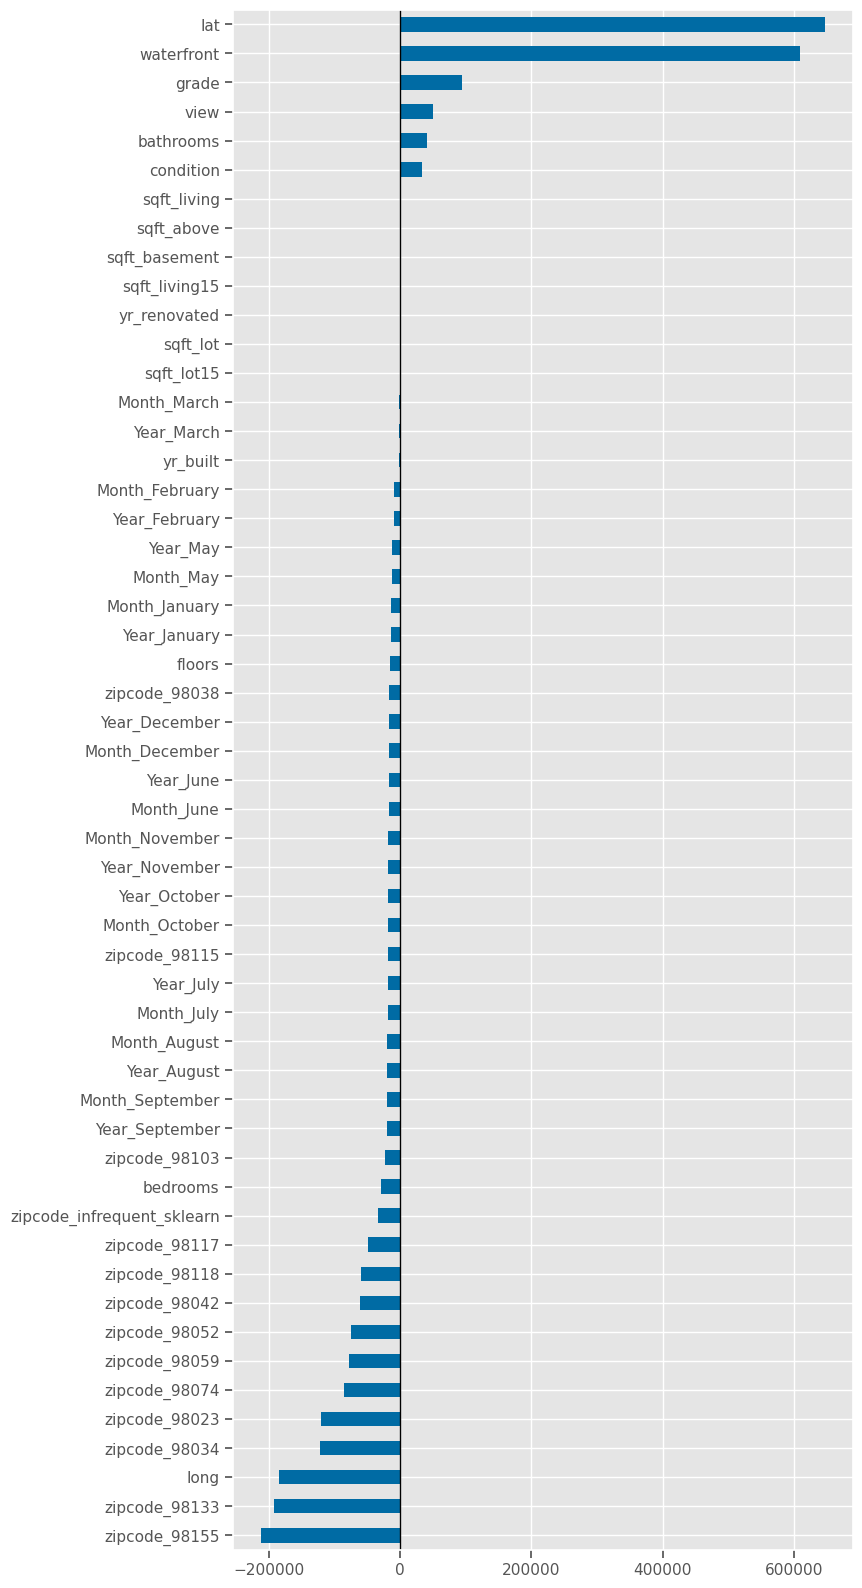

In [35]:
with sns.plotting_context('notebook'):
    ax = coeffs.sort_values().plot(kind='barh',figsize=(8,20))
    ax.axvline(0,color='k', lw=1)

### Dropping Zipcode